# Dataset description

In [2]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from statistics import mean, stdev
from sklearn.model_selection import KFold, cross_val_score

# read eating & health dataset

In [3]:
df = pd.read_csv("ehresp_2014.csv")

# display data head
df.head(5)

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


In [4]:
d=list(df.columns.values) # list of culumns name only
df.shape

(11212, 37)

# DATA CLEANING

In [5]:
df.isnull().sum() 

tucaseid       0
tulineno       0
eeincome1      0
erbmi          0
erhhch         0
erincome       0
erspemch       0
ertpreat       0
ertseat        0
ethgt          0
etwgt          0
eudietsoda     0
eudrink        0
eueat          0
euexercise     0
euexfreq       0
eufastfd       0
eufastfdfrq    0
euffyday       0
eufdsit        0
eufinlwgt      0
eusnap         0
eugenhth       0
eugroshp       0
euhgt          0
euinclvl       0
euincome2      0
eumeat         0
eumilk         0
euprpmel       0
eusoda         0
eustores       0
eustreason     0
eutherm        0
euwgt          0
euwic          0
exincome1      0
dtype: int64

In [6]:
df.describe()

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
count,1.121200e+04,11212.0,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,...,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000
mean,2.014066e+13,1.0,1.293525,26.291250,2.885212,2.036479,1.872547,65.678113,16.759900,-0.003122,...,0.529344,1.157867,1.464592,0.738494,0.788887,1.366572,0.844006,168.182572,0.512130,4.475027
std,3.456735e+08,0.0,0.845532,8.737788,0.443716,1.694437,2.915099,48.080541,50.643598,0.182376,...,0.985731,1.338405,0.691768,1.285256,1.301327,1.872375,1.408404,56.893436,1.481951,17.634628
min,2.014010e+13,1.0,-3.000000,-1.000000,1.000000,-1.000000,-1.000000,0.000000,-3.000000,-1.000000,...,-2.000000,-3.000000,-3.000000,-2.000000,-3.000000,-3.000000,-3.000000,-5.000000,-3.000000,-1.000000
25%,2.014030e+13,1.0,1.000000,23.000000,3.000000,1.000000,-1.000000,30.000000,0.000000,0.000000,...,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,140.000000,-1.000000,0.000000
50%,2.014061e+13,1.0,1.000000,26.500000,3.000000,1.000000,1.000000,60.000000,3.000000,0.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,168.000000,1.000000,0.000000
75%,2.014091e+13,1.0,2.000000,30.400000,3.000000,3.000000,5.000000,90.000000,15.000000,0.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,200.000000,2.000000,0.000000
max,2.014121e+13,1.0,3.000000,73.599998,3.000000,5.000000,5.000000,508.000000,990.000000,2.000000,...,2.000000,2.000000,3.000000,2.000000,5.000000,6.000000,2.000000,340.000000,2.000000,87.000000


In [7]:
df['erbmi'].value_counts() # count the unique values for the target feature 

-1.000000     575
 25.799999    319
 26.600000    273
 25.100000    218
 24.400000    192
 27.400000    188
 28.299999    156
 25.700001    131
 23.700001    129
 28.200001    123
 23.000000    122
 23.600000    117
 27.500000    114
 27.299999    113
 29.299999    108
 29.000000    105
 24.299999    103
 26.500000    101
 25.000000    100
 22.299999     96
 21.900000     91
 22.700001     89
 29.200001     89
 30.000000     88
 27.100000     87
 28.100000     86
 30.100000     86
 23.799999     85
 21.600000     82
 23.400000     80
             ... 
 47.200001      1
 54.400002      1
 49.900002      1
 55.400002      1
 57.200001      1
 48.599998      1
 49.200001      1
 50.599998      1
 13.700000      1
 16.500000      1
 15.900000      1
 36.700001      1
 54.000000      1
 55.700001      1
 42.700001      1
 45.799999      1
 52.700001      1
 48.400002      1
 58.599998      1
 47.599998      1
 54.599998      1
 43.700001      1
 53.299999      1
 40.599998      1
 38.200001

In [8]:
df=df.loc[df['erbmi']!= -1]  
df.describe(include='all')

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
count,1.063700e+04,10637.0,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000,...,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000,10637.000000
mean,2.014066e+13,1.0,1.309486,27.766522,2.885964,2.041365,1.873461,65.851744,16.895459,0.011657,...,0.520353,1.146564,1.477860,0.749553,0.778697,1.359970,0.836326,176.277146,0.511422,4.039861
std,3.456138e+08,0.0,0.806329,6.167176,0.441658,1.679181,2.915181,48.088072,50.963330,0.139357,...,0.988693,1.343591,0.672629,1.284282,1.299863,1.874511,1.409420,44.267974,1.480342,16.766439
min,2.014010e+13,1.0,-3.000000,13.000000,1.000000,-1.000000,-1.000000,0.000000,-2.000000,0.000000,...,-2.000000,-3.000000,-2.000000,-2.000000,-2.000000,-3.000000,-2.000000,98.000000,-2.000000,0.000000
25%,2.014030e+13,1.0,1.000000,23.600000,3.000000,1.000000,-1.000000,30.000000,0.000000,0.000000,...,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,145.000000,-1.000000,0.000000
50%,2.014061e+13,1.0,1.000000,26.600000,3.000000,1.000000,1.000000,60.000000,4.000000,0.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,170.000000,1.000000,0.000000
75%,2.014091e+13,1.0,2.000000,30.700001,3.000000,3.000000,5.000000,90.000000,15.000000,0.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,200.000000,2.000000,0.000000
max,2.014121e+13,1.0,3.000000,73.599998,3.000000,5.000000,5.000000,508.000000,990.000000,2.000000,...,2.000000,2.000000,3.000000,2.000000,5.000000,6.000000,2.000000,340.000000,2.000000,87.000000


# Performing the Multiple Linear Regression

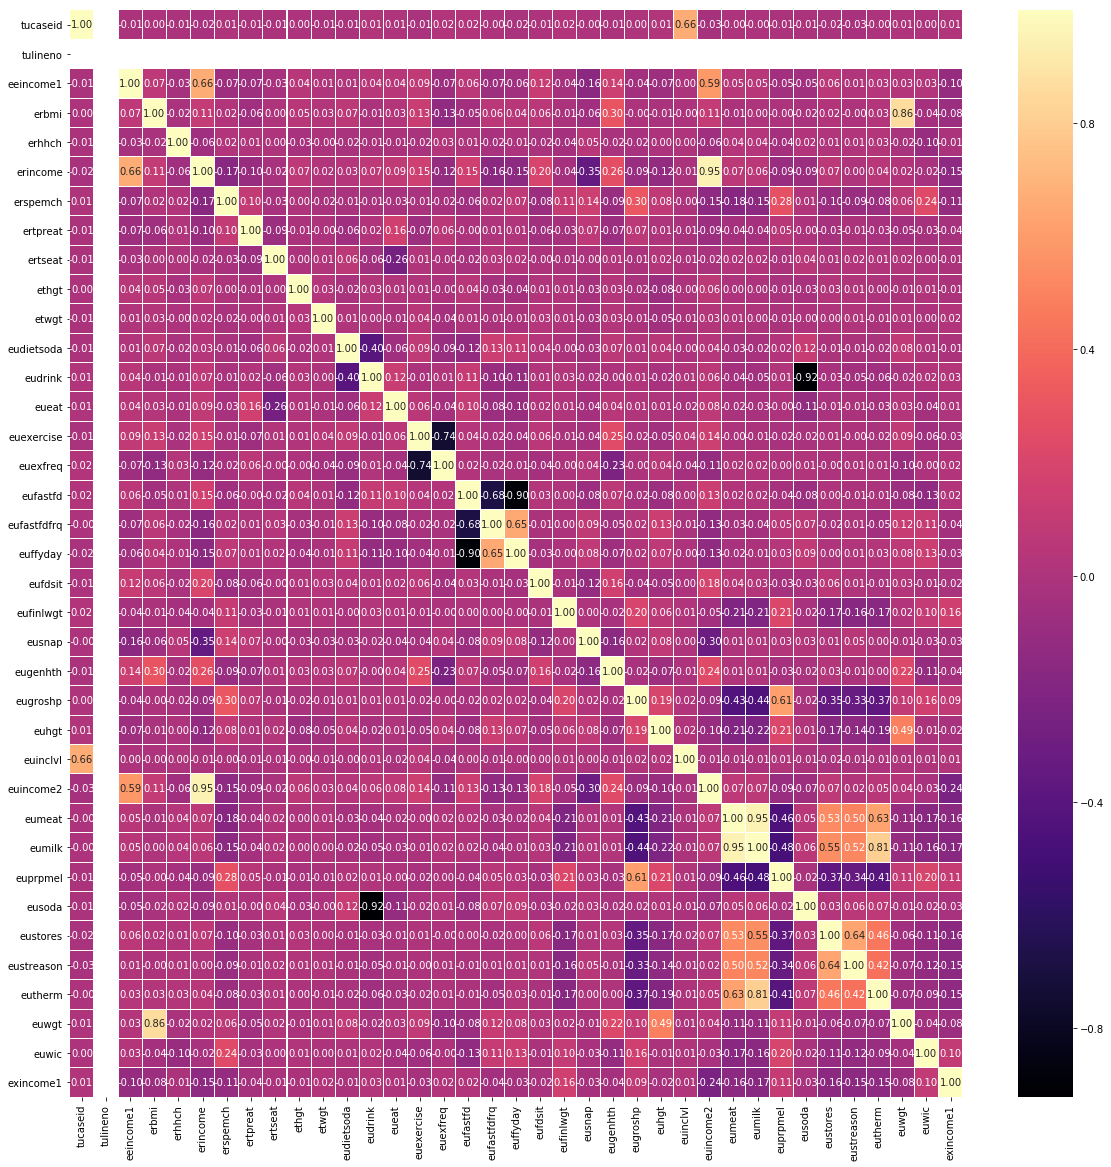

In [9]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [10]:
drop_cols = ['erbmi','tulineno']  # drop columns
X=df.drop(columns= drop_cols,axis=1)
y=df.erbmi

In [11]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
y_scaled = sc.fit_transform(y.values.reshape(len(y),1)).ravel()

C:\Users\Owner\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Downloads\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#Importing learning model and using RFE to choose the best subset of X for the model:

#from sklearn.linear_model import LinearRegression
#from sklearn.feature_selection import RFE


In [19]:
linreg = LinearRegression()  
results=[]
list_r2=[]
max_r2 = 0
for i in range(1,len(X_scaled[0])+1):
    selector = RFE(linreg, i, step=1)
    selector = selector.fit(X_scaled, y_scaled)
    if len(X_scaled[0])-i-1 > 0:
        adj_r2 = 1 - ((len(X_scaled)-1)/(len(X_scaled[0])-i-1))*(1-selector.score(X_scaled, y_scaled))
    else:
        adj_r2 = selector.score(X_scaled, y_scaled)
    list_r2.append(adj_r2)# mse = 
    if max_r2 < adj_r2:
        sel_features = selector.support_
        max_r2 = adj_r2
        
X_sub = X_scaled[:,sel_features]

X=X_sub
y=y_scaled

X.shape

(10637, 35)

# Split data into training / testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
 

In [14]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test) # generate Y basing on our regression model
#accuracy_score(y_test, y_pred)

In [15]:
print("##### Regression in sickitlearn")
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

##### Regression in sickitlearn
Intercept: 
 -0.0006832652474537499
Coefficients: 
 [ 1.68790830e-03  2.06628534e-03 -1.58876335e-03 -2.97800924e-04
 -2.80116238e-03  1.05173332e-03  3.54676858e-04  7.54622198e-03
 -2.25405321e-02  2.77159466e-03  4.71969756e-03  1.52095672e-03
  2.86432515e-03  2.61698329e-03  6.16249196e-04 -1.82254879e-03
  4.07431247e-03  1.40680997e-03  8.35405068e-04 -2.30357489e-03
  1.84508401e-03 -5.05991533e-03 -5.68133009e-01 -2.93010302e-03
  4.91625149e-03  3.57543593e-03 -8.96966920e-03  2.74926955e-03
  3.06816592e-03  2.99595520e-03 -1.15211708e-06  1.13002511e-03
  1.13396394e+00 -9.73038426e-05 -1.14085223e-03]


In [16]:
# The mean square error
print("Mean Squared Error (training): %.2f " %( mean_squared_error(y_train, regr.predict(X_train))))
print("Mean Squared Error (testing): %.2f " %( mean_squared_error(y_test, y_pred)))

# R-square scores: 1 is perfect fitting / prediction 
print("R- Square score (training): %.2f " % regr.score (X_train, y_train) )  
print("R- Square score (testing): %.2f " % r2_score (y_test, y_pred ))


Mean Squared Error (training): 0.02 
Mean Squared Error (testing): 0.02 
R- Square score (training): 0.98 
R- Square score (testing): 0.98 


Regression in Statmodel

In [17]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
Model_summary = model.summary()
print(Model_summary)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.884e+04
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        13:40:14   Log-Likelihood:                 6958.9
No. Observations:               10637   AIC:                        -1.385e+04
Df Residuals:                   10601   BIC:                        -1.358e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.442e-15      0.001  -7.73e-12      1.0

In [18]:
linreg = LinearRegression()
shuffle = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(linreg, X, y, cv=shuffle)
print(scores) 

print('Mean of testing R-Squared over 5 folds =', mean(scores), 'with std=', stdev(scores))

[0.98438337 0.98293974 0.98229689 0.98484506 0.98548855]
Mean of testing R-Squared over 5 folds = 0.9839907220315349 with std= 0.0013324010093945405
